# Trendet e blerjeve të konsumatorëve 

Qëllimi i priprocesimit të "Customer Shopping Preferences Dataset" është të pastrojmë dhe strukturojmë të dhënat për analizë më të thellë, duke zbuluar tendencat dhe parapëlqimet e konsumatorëve. Ky proces do të ndihmojë në identifikimin e modeleve të blerjes dhe do të kontribuojë në përmirësimin e strategjive të marketingut dhe ofertave të produkteve për të rritur kënaqësinë e klientit. Analiza ofron njohuri mbi sjelljen e konsumatorëve dhe modelet e blerjeve duke përfshirë detaje të tilla si mosha, gjinia, ngjyra, madhësia, mënyrat e preferuara të pagesës dhe blejra në bazë të sezonave.

### Libraritë e përdorura

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import gzip
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import plotly.express as px
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy import stats

### Konstantet e përdorura

In [3]:
# Përcaktimi i ngjyrave për ti paraqitur në statistika.
colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

# Lista e vlerave të mundshme për zhurmë në kolonën "Category"
lista_e_kategorive_zhurme = ["", "", "", "Special ", "Limited Edition ", "Exlusive "]

### Metodat ndihmëse

In [4]:
# Funksioni për të hedhur një vështrim në rreshtat e parë të dataset-it.
def printo_datasetin(text, df):
    print("\n" + text + ":")
    display(df.head())

# Funksioni për shtimin e zhurmës në kolonën "Category"
def shto_zhurme_ne_kategori(df):
    zhurma = np.random.choice(lista_e_kategorive_zhurme, size=len(df))
    df['Category'] = df['Category'] + zhurma

# Funksioni për përdorimin e boxplotit për analizën e zhurmës
def shfaq_boxplotin_per_zhurme(title, df):
    plt.figure(figsize=(10, 6))
    df.boxplot(column='Purchase Amount (USD)', by='Category', showfliers=False)
    plt.title(title)
    plt.suptitle('')
    plt.show()

# Funksioni për përdorimin e pie chart për shfaqjen e grafikave
def shfaq_pie_chart(title, df):
    plt.figure(figsize = (20, 6))
    counts = df["Category"].value_counts()
    explode = (0, 0.1, 0.1, 0.1)
    counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
    plt.xlabel(title, weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
    plt.axis('equal') 
    plt.legend(labels = counts.index, loc = "best")
    plt.show()

# Funksioni për gjetjën e gjinisë më të përdorur sipas stinës
def gjej_gjinine_me_te_perdorur_per_stine(df):
    # Grupimi sipas 'Season' dhe 'Gender', pastaj numërimi i rasteve
    season_gender_counts = df.groupby(['Season', 'Gender']).size().reset_index(name='Counts')
    # Gjetja e gjinisë më të shpeshtë për çdo stinë
    most_frequent_gender = season_gender_counts.loc[season_gender_counts.groupby('Season')['Counts'].idxmax()]
    return most_frequent_gender

 # Funksioni për fshirjen e kolonës
def fshij_kolonen(column,df):
    df.drop(column, axis=1)

### Leximi i dataset-it

In [5]:
# Leximi i dataset-it
df=pd.read_csv("../files/Shopping_Trends_Dataset.csv")

## FAZA 1

### Kualiteti i të dhënave 

- Struktura e bazës së të dhënave

In [6]:
# Shfaqja e dataseti-it
printo_datasetin("Dataset-i", df)


Dataset-i:


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55.0,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19.0,Female,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50.0,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21.0,Female,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45.0,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


- Njohuri mbi llojet e të dhënave

In [425]:
# Për të fituar njohuri mbi llojet e të dhënave ekzekutojmë këtë komandë:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3951 entries, 0 to 3950
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3951 non-null   int64  
 1   Age                     3948 non-null   float64
 2   Gender                  3950 non-null   object 
 3   Item Purchased          3951 non-null   object 
 4   Category                3950 non-null   object 
 5   Purchase Amount (USD)   3951 non-null   int64  
 6   Location                3951 non-null   object 
 7   Size                    3951 non-null   object 
 8   Color                   3951 non-null   object 
 9   Season                  3951 non-null   object 
 10  Review Rating           3951 non-null   float64
 11  Subscription Status     3951 non-null   object 
 12  Shipping Type           3951 non-null   object 
 13  Discount Applied        3951 non-null   object 
 14  Promo Code Used         3951 non-null   

- Kontrollimi i vlerave null

In [426]:
# Komanda për kontrollimin e vlerave null:
df.isnull().sum()

Customer ID               0
Age                       3
Gender                    1
Item Purchased            0
Category                  1
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [427]:
# ----------- Zevëndësimi i vlerave null -----------

# Kalkulimi i moshës mesatare, duke mos i përfshirë vlerat NaN
average_age = df['Age'].mean()

# Zevëndësimi i vlerave NaN i kolonës Age me moshën mesatare
df['Age'].fillna(average_age, inplace=True)

# Shfaqja e dataseti-it të modifikuar
print(df.isnull().sum())

Customer ID               0
Age                       0
Gender                    1
Item Purchased            0
Category                  1
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


In [428]:
# Fshirja e rreshtave me vlera null në kolonat me vlera null
df = df.dropna(subset=['Customer ID', 'Gender', 'Item Purchased', 'Category', 
                    'Purchase Amount (USD)', 'Location', 'Size', 'Color', 
                    'Season', 'Review Rating', 'Subscription Status', 
                    'Shipping Type', 'Discount Applied', 'Promo Code Used', 
                    'Previous Purchases', 'Payment Method', 'Frequency of Purchases'])

# Shfaqja e dataseti-it të modifikuar
print(df.isnull().sum())


Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


- Kërkimi i duplikatëve

In [429]:
# Komanda për kërkimin e duplikateve dhe shfaqja e rezultatit
print("Duplikatet: " + str(df.duplicated().sum()))

Duplikatet: 40


In [430]:
# ----------- Fshirja e duplikateve -----------
df.drop_duplicates(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category', 
                    'Purchase Amount (USD)', 'Location', 'Size', 'Color', 
                    'Season', 'Review Rating', 'Subscription Status', 
                    'Shipping Type', 'Discount Applied', 'Promo Code Used', 
                    'Previous Purchases', 'Payment Method', 'Frequency of Purchases'], 
                   keep='first', inplace=True)

# Kërkimi përsëri i duplikateve dhe shfaqja e rezultatit
print("Duplikatet: " + str(df.duplicated().sum()))

Duplikatet: 0


 #### Fshirja e kolonave

In [47]:
# Fshirja e kolonës 'Frequency of Purchases'
new_df = new_df.drop('Frequency of Purchases', axis=1)

# Shfaqja e disa rreshtave të datasetit pas heqjes së kolonës 'Frequency of Purchases'
printo_datasetin("Dataset-i", new_df)


Dataset-i:


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,distanca_deri_te_qendra
0,1,55.0,Male,Blouse,Clothing,72.868566,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,17.598307
1,2,19.0,Female,Sweater,Clothing,58.469428,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,30.006627
2,3,50.0,Male,Jeans,Clothing,98.907542,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,9.286020
3,4,21.0,Female,Sandals,Footwear,150.921194,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,25.174665
4,5,45.0,Male,Blouse,Clothing,39.633865,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,9.998360


In [449]:
# Fshirja e kolonës 'Previous Purchases'
new_df = new_df.drop('Previous Purchases', axis=1)

# Shfaqja e disa rreshtave të datasetit pas heqjes së kolonës 'Previous Purchases'
printo_datasetin("Dataset-i", new_df)


Dataset-i:


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method
0,1,55.0,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,Venmo
1,2,19.0,Female,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,Cash
2,3,50.0,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,Credit Card
3,4,21.0,Female,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,PayPal
4,5,45.0,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,PayPal


### Preprocesimi i të dhënave

- Reduktimi i dimensionalitetit

In [450]:
# Pasi qe kolonat: Discount Applied (Yes/No) dhe Promo Code Used (Yes/No) paraqesin aplikim të zbritjeve të produktit, 
# informacionin e të dy kolonave mund ta paraqesim në kolonën Sale Applied.

new_df['Sale Applied'] = new_df.apply(lambda row: 'Yes' if row['Discount Applied'] == 'Yes' or row['Promo Code Used'] == 'Yes' else 'No', axis=1)
new_df = new_df.drop('Discount Applied', axis=1)
new_df = new_df.drop('Promo Code Used', axis=1)
# Shfaqja e disa rreshtave të datasetit pas heqjes së kolonës 'Previous Purchases'
printo_datasetin("Dataset-i", new_df)


Dataset-i:


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Payment Method,Sale Applied
0,1,55.0,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Venmo,Yes
1,2,19.0,Female,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Cash,Yes
2,3,50.0,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Credit Card,Yes
3,4,21.0,Female,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,PayPal,Yes
4,5,45.0,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,PayPal,Yes


- Mostrimi i të dhënave

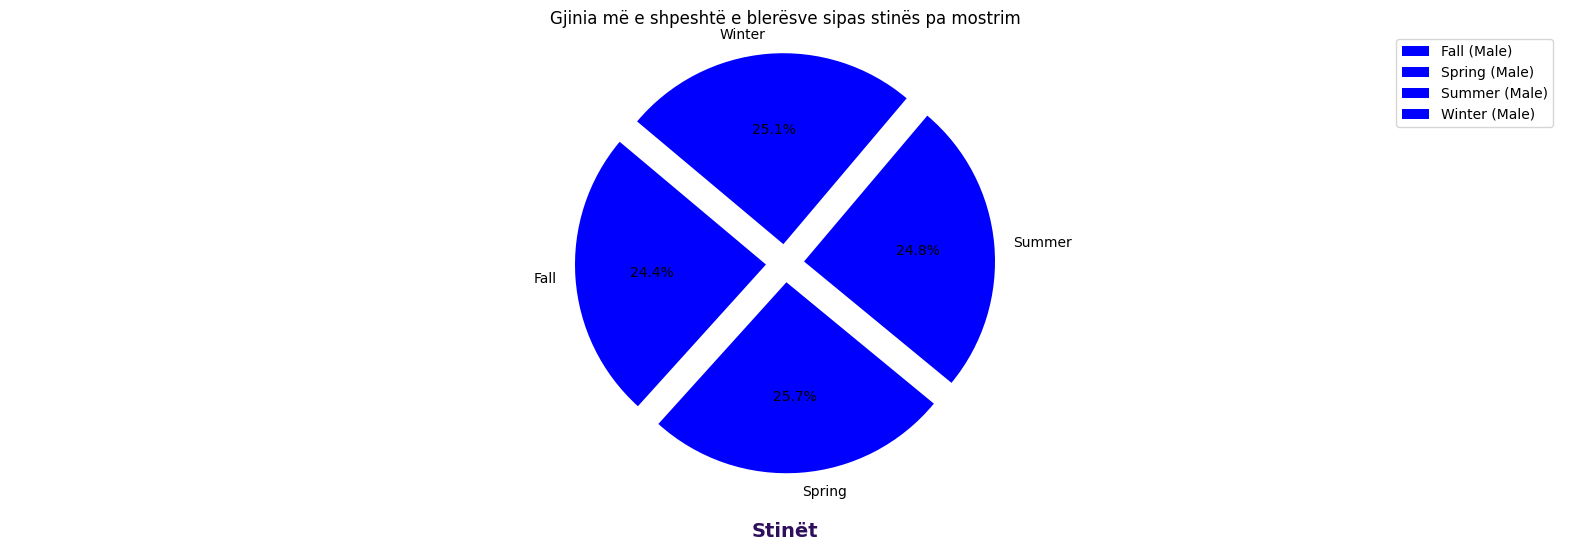

In [451]:
# ----------- Paraqitja e gjinisë më të shpeshtë gjatë stinëve pa mostrim -----------

# Gjetja e gjinisë më të shpeshtë për çdo stinë me të dhënat e mostrës
most_frequent_gender = gjej_gjinine_me_te_perdorur_per_stine(df)

# Numri total i rasteve për gjininë më të shpeshtë në të gjitha stinët
total_counts = most_frequent_gender['Counts'].sum()

# Llogaritja e madhësive për grafikonin e pie
sizes = most_frequent_gender['Counts'] / total_counts * 100

# Përdorimi i një palete të paracaktuar të ngjyrave për gjinitë
gender_colors = {'Male': 'blue', 'Female': 'pink'}

# Aplikimi i ngjyrave bazuar në gjininë më të shpeshtë
pie_colors = most_frequent_gender['Gender'].map(gender_colors)

# Vizatimi i grafikonit të pie
plt.figure(figsize=(20, 6))
labels = most_frequent_gender['Season']
explode = [0.1] * len(labels)

plt.pie(sizes, labels=labels, colors=pie_colors, explode=explode, autopct='%1.1f%%', startangle=140)
plt.title('Gjinia më e shpeshtë e blerësve sipas stinës pa mostrim')
plt.xlabel('Stinët', weight="bold", color="#2F0F5D", fontsize=14, labelpad=20)
plt.axis('equal')
plt.legend(labels=[f'{stina} ({gjinia})' for stina, gjinia in zip(labels, most_frequent_gender['Gender'])], loc="best")
plt.show()

In [452]:
# Marrja e rreshtave të datasetit për mostrim
sample_df = df.sample(n=500)

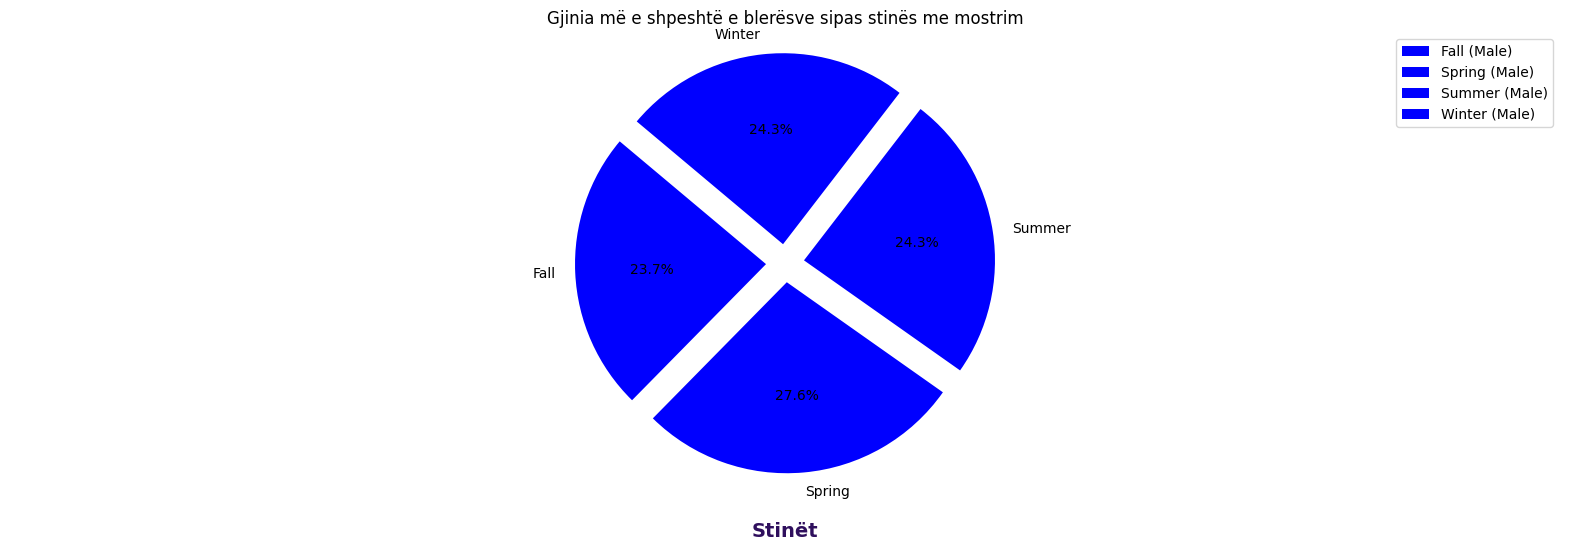

In [453]:
# ----------- Paraqitja e gjinisë më të shpeshtë gjatë stinëve me mostrim -----------

# Gjetja e gjinisë më të shpeshtë për çdo stinë me të dhënat e mostrës
most_frequent_gender = gjej_gjinine_me_te_perdorur_per_stine(sample_df)

# Numri total i rasteve për gjininë më të shpeshtë në të gjitha stinët
total_counts = most_frequent_gender['Counts'].sum()

# Llogaritja e madhësive për grafikonin e pie
sizes = most_frequent_gender['Counts'] / total_counts * 100

# Përdorimi i një palete të paracaktuar të ngjyrave për gjinitë
gender_colors = {'Male': 'blue', 'Female': 'pink'}

# Aplikimi i ngjyrave bazuar në gjininë më të shpeshtë
pie_colors = most_frequent_gender['Gender'].map(gender_colors)

# Vizatimi i grafikonit të pie
plt.figure(figsize=(20, 6))
labels = most_frequent_gender['Season']
explode = [0.1] * len(labels) 

plt.pie(sizes, labels=labels, colors=pie_colors, explode=explode, autopct='%1.1f%%', startangle=140)
plt.title('Gjinia më e shpeshtë e blerësve sipas stinës me mostrim')
plt.xlabel('Stinët', weight="bold", color="#2F0F5D", fontsize=14, labelpad=20)
plt.axis('equal')
plt.legend(labels=[f'{stina} ({gjinia})' for stina, gjinia in zip(labels, most_frequent_gender['Gender'])], loc="best")
plt.show()

- Agregimi i të dhënave

In [454]:
# ----------- Shembull i agregimit -----------

# Agregimi i moshës mesatare dhe shumës së blerjes sipas gjinisë
avg_age_purchase_by_gender = sample_df.groupby('Gender').agg({
    'Age': 'mean',
    'Purchase Amount (USD)': 'mean'
})

# Shfaq rezultatin
print(avg_age_purchase_by_gender)

              Age  Purchase Amount (USD)
Gender                                  
Female  43.693252              61.920942
Male    44.138024              61.434634


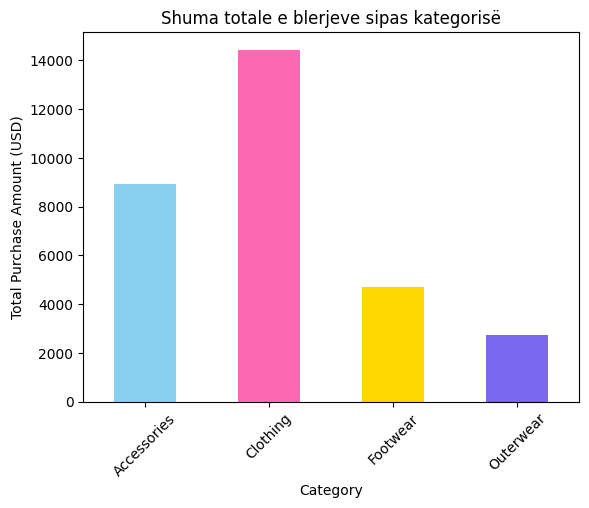

In [455]:
# ----------- Shembull i agregimit -----------

# Agregimi i të dhënave për shumën totale të blerjeve sipas kategorisë
total_purchase_by_category = sample_df.groupby('Category')['Purchase Amount (USD)'].sum()

# Vizualizimi i të dhënave
total_purchase_by_category.plot(kind='bar', color=colors)
plt.xlabel('Category')
plt.ylabel('Total Purchase Amount (USD)')
plt.title('Shuma totale e blerjeve sipas kategorisë')
plt.xticks(rotation=45)
plt.show()

- Diskretizimi 

In [456]:
# Metoda e Binning për Lehtësimin e të Dhënave
# 'Age' është kolona që duam të ndajme në bins (blloqe)
# Përcaktimi i kufijëve të bins (blloqeve)
age_bin_edges = [0, 1, 4, 12, 19, 39, 59, 100]

# Krijimi i një kolonë të re me etiketa të bins (blloqeve)
age_categories = ['Infant', 'Toddler', 'Child', 'Teen', 'Adult', 'Middle Age Adult', 'Senior Adult']
new_df['Age Category'] = pd.cut(new_df['Age'], bins=age_bin_edges, labels=age_categories)

# Shfaqja DataFrame
print(new_df[['Age', 'Age Category']])

            Age      Age Category
0     55.000000  Middle Age Adult
1     19.000000              Teen
2     50.000000  Middle Age Adult
3     21.000000             Adult
4     45.000000  Middle Age Adult
...         ...               ...
3939  52.000000  Middle Age Adult
3940  46.000000  Middle Age Adult
3941  44.000000  Middle Age Adult
3942  52.000000  Middle Age Adult
3943  44.513931  Middle Age Adult

[3902 rows x 2 columns]


- Zgjedhja e nën bashkësisë së vetive

In [457]:
# Zgjidhja e vetive vetëm për blerjet e kategorisë "Clothing".
subset_clothing = df[df['Category'] == 'Clothing']

# Shfaqja e disa rreshtave të nën bashkësisë së zgjedhur
subset_clothing.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55.0,Male,Blouse,Clothing,62.934283,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19.0,Female,Sweater,Clothing,61.234714,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50.0,Male,Jeans,Clothing,85.953771,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
4,5,45.0,Male,Blouse,Clothing,44.316933,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
6,7,63.0,Male,Shirt,Clothing,116.584256,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly


- Krijimi i vetive

In [458]:
# Krijimi i nje vetije te re që përmban vetëm blerjet me shumë me të lartë se 50 USD.
vetija_e_re = df[df['Purchase Amount (USD)'] > 50]

# Shfaqja e disa rreshtave të vetisë së re
vetija_e_re.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55.0,Male,Blouse,Clothing,62.934283,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19.0,Female,Sweater,Clothing,61.234714,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50.0,Male,Jeans,Clothing,85.953771,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21.0,Female,Sandals,Footwear,120.460597,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
6,7,63.0,Male,Shirt,Clothing,116.584256,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly


- Binarizimi

In [459]:
# Binarizimi i kolonës
df['Is_Female'] = (df['Gender'] == 'Female').astype(int)

# Shfaqja e disa rreshtave të datasetit me kolonën e re të krijuar
df[['Is_Female', 'Gender']].head()

,Is_Female,Gender
0,0,Male
1,1,Female
2,0,Male
3,1,Female
4,0,Male


- Transformimi

In [460]:
# Kthe vlerat e kolonës "Age" nga float në int
new_df['Age'] = new_df['Age'].astype(int)
printo_datasetin('Dataset-i', new_df)


Dataset-i:


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Payment Method,Sale Applied,Age Category
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Venmo,Yes,Middle Age Adult
1,2,19,Female,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Cash,Yes,Teen
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Credit Card,Yes,Middle Age Adult
3,4,21,Female,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,PayPal,Yes,Adult
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,PayPal,Yes,Middle Age Adult


### Dataset-i i procesuar

- Krijimi i dataset-it

In [41]:
# Dataseti i priprocesuar
new_df = new_df.reset_index(drop=True)
new_df.to_csv("../files/Preprocessed_Shopping_Trends_Dataset.csv", index=False)

- Kompresimi

In [462]:
# Ruajtja e Datasetit në një skedar CSV të kompresuar
compressed_file_path = '../files/compressed_data.csv.gz'
with gzip.open(compressed_file_path, 'wt', encoding='utf-8') as f:
    new_df.to_csv(f, index=False)

print(f"Te dhenat jane te kompresuara dhe ruajtura ne {compressed_file_path}")

Te dhenat jane te kompresuara dhe ruajtura ne ../files/compressed_data.csv.gz


In [463]:
# Ngarko të dhënat e kompresuara në një dateset
with gzip.open('../files/compressed_data.csv.gz', 'rt', encoding='utf-8') as f:
    new_df = pd.read_csv(f)

# Shfaqja dataset-it
printo_datasetin("Dataset-i i kompresuar", new_df)


Dataset-i i kompresuar:


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Payment Method,Sale Applied,Age Category
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Venmo,Yes,Middle Age Adult
1,2,19,Female,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Cash,Yes,Teen
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Credit Card,Yes,Middle Age Adult
3,4,21,Female,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,PayPal,Yes,Adult
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,PayPal,Yes,Middle Age Adult


## FAZA 2

#### Outliers

##### Shembulli i moshës

- Statistic based

<Axes: xlabel='Age'>

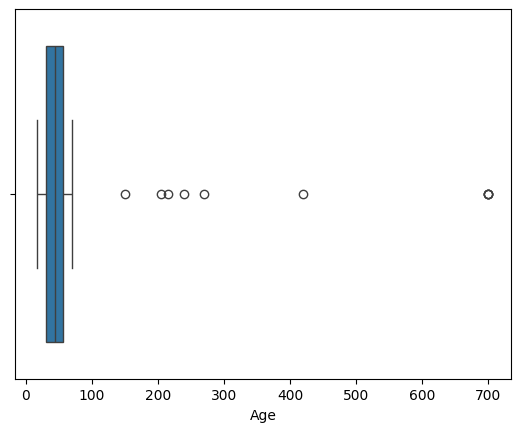

In [5]:
# Përdorimi i paketës seaborn për të paraqitur Outliers në kolonën mosha 
sns.boxplot(df['Age'], orient='h')

- Density based

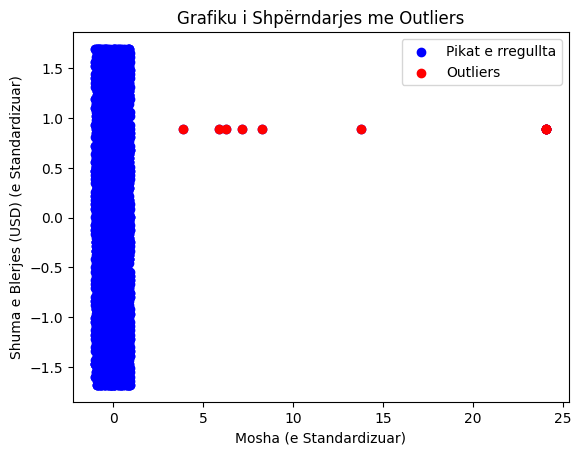

In [6]:
# Konverto vlerat në vlera numerike
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Purchase Amount (USD)'] = pd.to_numeric(df['Purchase Amount (USD)'], errors='coerce')

# Selektojme kolonat për grupim
X = df[['Age', 'Purchase Amount (USD)']]

# Standardizimi i karakteristikave
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.dropna())

# Aplikimi i DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Vizualizimi
# Grafiku i shpërndarjes për Moshën kundrejt Shumës së Blerjes (USD)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c='blue', label='Pikat e rregullta')

# Shënjimi i outliers
outliers = X_scaled[clusters == -1]
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', label='Outliers')

# Shtimi i etiketave dhe titullit
plt.xlabel('Mosha (e Standardizuar)')
plt.ylabel('Shuma e Blerjes (USD) (e Standardizuar)')
plt.title('Grafiku i Shpërndarjes me Outliers')
plt.legend()
plt.show()


- Clustering based

In [17]:
# Përzgjedhja e kolonave 'Age' dhe 'Purchase Amount (USD)' nga DataFrame
data_selected = df[['Age', 'Purchase Amount (USD)']]  

# Përdorimi i KMeans për grupim
data_selected_clean = data_selected.dropna()
kmeans = KMeans(n_clusters=3, n_init=10)  # Inicializimi i modelit KMeans me 3 qendra grupimesh (clusters)
kmeans.fit(data_selected_clean)  # Trajnimi i modelit KMeans 

# Llogaritja e distancës nga qendrat e grupimeve
distanca = cdist(data_selected, kmeans.cluster_centers_, 'euclidean')  # Llogaritja e distancës Euclidean nga çdo pikë te qendrat e grupimeve
distanca_minimale = np.min(distanca, axis=1)  # Gjetja e distancës minimale për çdo pikë nga qendrat e grupimeve
df['distanca_deri_te_qendra'] = distanca_minimale  # Ruajtja e distancës minimale në DataFrame

# Përcaktimi i pragut për outliers
pragu = np.percentile(distanca_minimale, 95)  # Vendosja e pragut si percentili i 95-të i distancës minimale
outliers = df[distanca_minimale > pragu]  # Identifikimi i outliers si ato pikat që kanë distancë më të madhe se pragu

# Vizualizimi i të dhënave
fig = px.scatter(df, x='Age', y='Purchase Amount (USD)', color='Gender', 
                 labels={'Age': 'Age', 'Purchase Amount (USD)': 'Purchase Amount (USD)'},  
                 title='Detektimi i Outliers Bazuar në Distancën KMeans')

fig.show()  # Shfaqja e grafikut

- Largimi i Outliers

In [18]:
# -----------  Largimi i Outliers me metodën Z-Score -----------

# Gjetja e limiteve
upper_limit = df['Age'].mean() + 3*df['Age'].std()
lower_limit = df['Age'].mean() - 3*df['Age'].std()
print('Limiti i sipërm:', upper_limit)
print('Limiti i poshtëm:', lower_limit)

Limiti i sipërm: 126.58629876138232
Limiti i poshtëm: -36.55450466600004


In [19]:
# -----------  Gjetja e Outliers -----------

df.loc[(df['Age'] > upper_limit) | (df['Age'] < lower_limit)]

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,distanca_deri_te_qendra
3944,3900,150.0,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly,105.786406
3945,3900,240.0,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly,195.785232
3946,3900,420.0,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly,224.000000
3947,3900,215.0,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly,170.785434
3948,3900,205.0,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly,160.785532
3949,3900,270.0,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly,225.785049
3950,3900,700.0,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly,56.000000
3951,3900,700.0,Female,Handbag,Accessories,81,California,M,Light Purple,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly,56.000000
3952,3900,700.0,Female,Handbag,Accessories,81,California,M,Light Purple,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly,56.000000
3953,3900,700.0,Female,Handbag,Accessories,81,California,M,Light Purple,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly,56.000000


In [46]:
# -----------  Largimi i të dhënave që janë paraqitur si Outliers -----------

new_df = df.loc[(df['Age'] <= upper_limit) & (df['Age'] >= lower_limit)]

print('Para largimit të Outliers:', len(df))
print('Pas largimit të Outliers:',len(new_df))
print('Outliers:', len(df)-len(new_df))

Para largimit të Outliers: 3963
Pas largimit të Outliers: 3953
Outliers: 10


<Axes: xlabel='Age'>

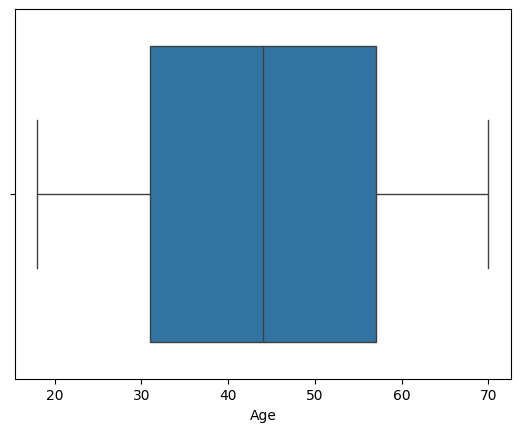

In [21]:
# -----------  Paraqitja e dataset-it pa Outliers -----------

sns.boxplot(new_df['Age'], orient='h')

##### Shembulli i ngjyrës

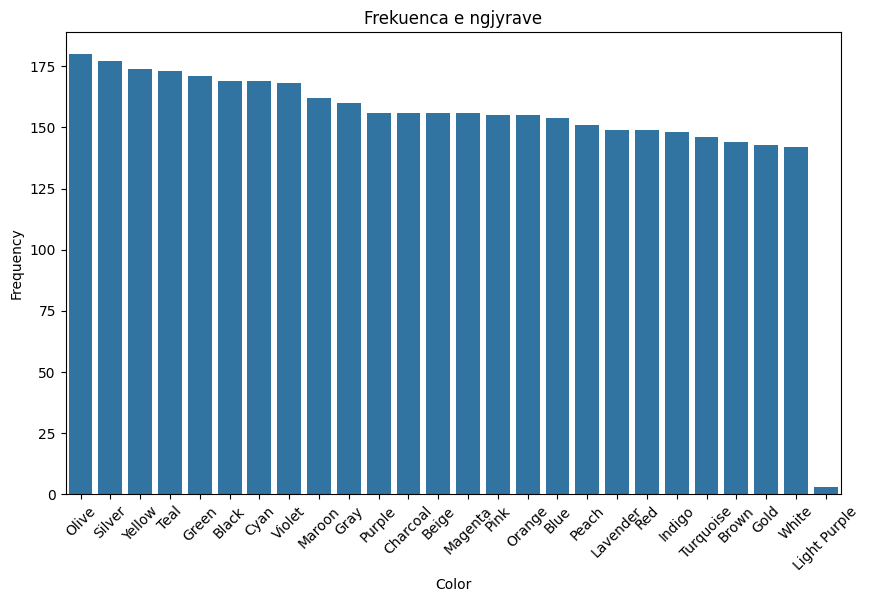

In [22]:
# Përdorimi i paketës seaborn për të paraqitur Outliers në kolonën e ngjyrës

# Llogaritja e frekuencës së secilës ngjyre
color_counts = df['Color'].value_counts()

# Paraqitja e frekuencës së ngjyrave duke përfshirë edhe outliers
plt.figure(figsize=(10, 6)) 
sns.barplot(x=color_counts.index, y=color_counts.values) 
plt.title("Frekuenca e ngjyrave") 
plt.xlabel("Color") 
plt.ylabel("Frequency") 
plt.xticks(rotation=45) 
plt.show() 

In [23]:
# Identifying potential outliers - colors with very low frequency
# Setting a threshold for outlier detection, e.g., colors that appear less than 2 times
outlier_threshold = 25
potential_outliers = color_counts[color_counts < outlier_threshold]
print("\nPotential Outliers in 'Color':")
print(potential_outliers)


Potential Outliers in 'Color':
Color
Light Purple    3
Name: count, dtype: int64


- Largimi i outliers

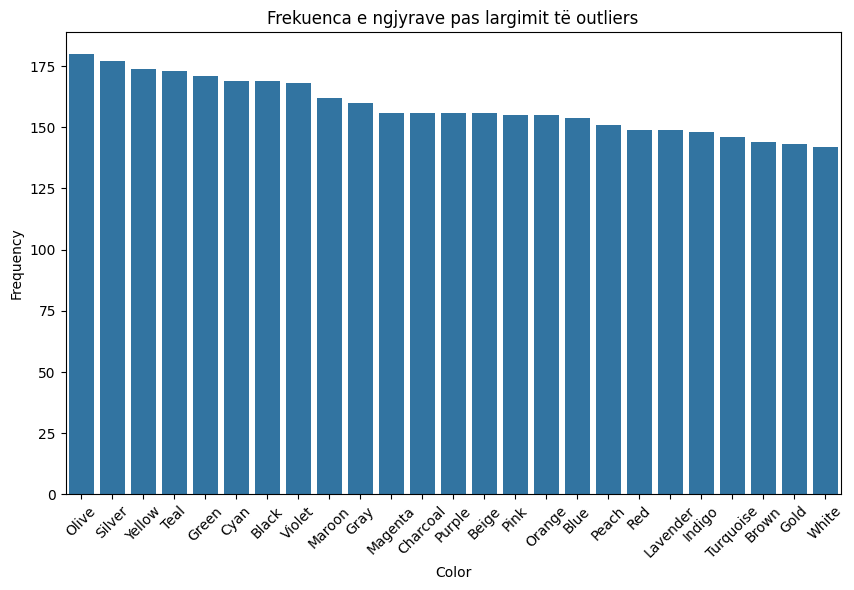

In [24]:
# Largimi i outliers nga kolona 'Color' bazuar në outliers të identifikuar

# Lista e ngjyrave të konsideruara si outliers
outlier_colors = potential_outliers.index.tolist()

# Largimi i rreshtave ku 'Color' është në listën e ngjyrave outlier
df = df[~df['Color'].isin(outlier_colors)]

# Llogaritja e re e frekuencës së ngjyrave pas largimit të outliers
new_color_counts = df['Color'].value_counts()

# Paraqitja e frekuencës së ngjyrave pas largimit të outliers
plt.figure(figsize=(10, 6)) 
sns.barplot(x=new_color_counts.index, y=new_color_counts.values) 
plt.title("Frekuenca e ngjyrave pas largimit të outliers") 
plt.xlabel("Color") 
plt.ylabel("Frequency") 
plt.xticks(rotation=45) 
plt.show() 


#### Noisy data

- Shtimi i zhurmës / Pastrimi në një kolonë numerike

In [26]:
# -----------  Shtimi i zhurmës -----------

np.random.seed(42)

# Shtimi i zhurmës në një kolonë numerike
kolona_zhurme = 'Purchase Amount (USD)'
df[kolona_zhurme] = df[kolona_zhurme] + np.random.normal(0, 20, size=len(df))

/var/folders/bq/gzx4f3357q3cfnbtrs3hr1r40000gn/T/ipykernel_1351/199313253.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
# Shfaqja e disa rreshtave të parë të datasetit me zhurmë
printo_datasetin("Dataset-i me zhurmë", df)


Dataset-i me zhurmë:


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,distanca_deri_te_qendra
0,1,55.0,Male,Blouse,Clothing,72.868566,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,17.598307
1,2,19.0,Female,Sweater,Clothing,58.469428,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,30.006627
2,3,50.0,Male,Jeans,Clothing,98.907542,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,9.286020
3,4,21.0,Female,Sandals,Footwear,150.921194,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,25.174665
4,5,45.0,Male,Blouse,Clothing,39.633865,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,9.998360


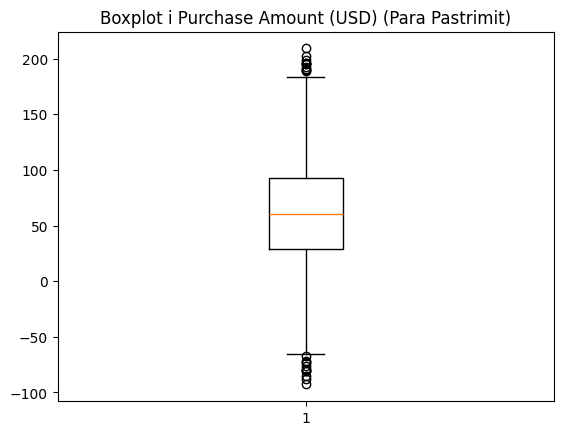

In [29]:
# -----------  Vizualizimi i dataset-it me zhurmë (Para Pastrimit) -----------

plt.boxplot(df[kolona_zhurme])
plt.title(f'Boxplot i {kolona_zhurme} (Para Pastrimit)')
plt.show()

In [30]:
# ----------- Trajtimi i  zhurmës bazuar në metodën IQR -----------

# Heqja e outliers bazuar në shtrirjen e kuadrit (IQR)
Q1 = df[kolona_zhurme].quantile(0.25)
Q3 = df[kolona_zhurme].quantile(0.75)
IQR = Q3 - Q1
limiti_i_ulët = Q1 - 1.5 * IQR
limiti_i_lartë = Q3 + 1.5 * IQR

In [32]:
# Pastrimi i dataset-it
df_pastruar = df[(df[kolona_zhurme] >= limiti_i_ulët) & (df[kolona_zhurme] <= limiti_i_lartë)]

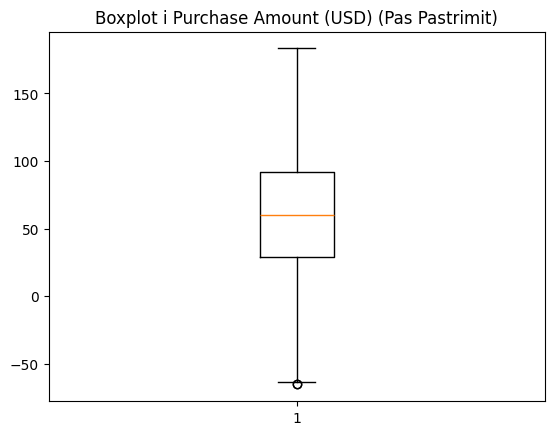

In [33]:
# ----------- Vizualizimi i datasetit të pastruar më zhurmë -----------

plt.boxplot(df_pastruar[kolona_zhurme])
plt.title(f'Boxplot i {kolona_zhurme} (Pas Pastrimit)')
plt.show()

- Shtimi i zhurmës / Pastrimi në një kolonë string

In [36]:
# ----------- Shto zhurmë në kolonën "Category" -----------
shto_zhurme_ne_kategori(df)

/var/folders/bq/gzx4f3357q3cfnbtrs3hr1r40000gn/T/ipykernel_1351/1641624224.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
# Shfaq datasetin me zhurmë
printo_datasetin("Dataset-i me zhurmë", df)


Dataset-i me zhurmë:


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,distanca_deri_te_qendra
0,1,55.0,Male,Blouse,ClothingExlusive Limited Edition,72.868566,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,17.598307
1,2,19.0,Female,Sweater,Clothing,58.469428,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,30.006627
2,3,50.0,Male,Jeans,ClothingExlusive,98.907542,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,9.286020
3,4,21.0,Female,Sandals,Footwear,150.921194,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,25.174665
4,5,45.0,Male,Blouse,ClothingLimited Edition,39.633865,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,9.998360


<Figure size 1000x600 with 0 Axes>

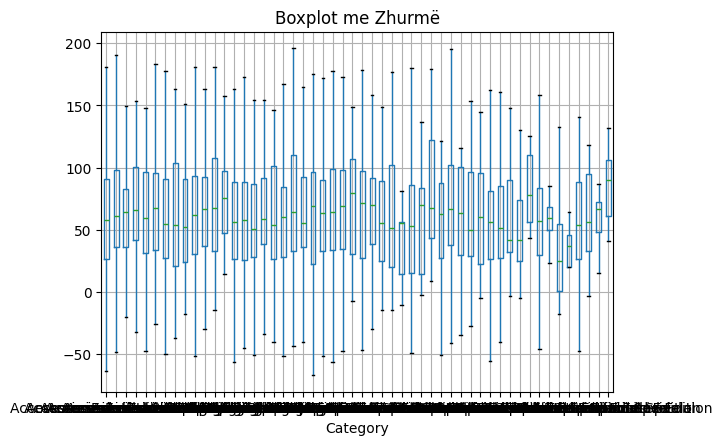

In [38]:
# Shfaq boxplotin me zhurmë
shfaq_boxplotin_per_zhurme('Boxplot me Zhurmë', df)

In [39]:
# Hiqe të dhënat me zhurmë
df['Category'] = df['Category'].str.replace('|'.join(lista_e_kategorive_zhurme), '', regex=True)
# Hiq rreshtat ku 'Category' është e zbrazët
df = df[df['Category'] != '']  

/var/folders/bq/gzx4f3357q3cfnbtrs3hr1r40000gn/T/ipykernel_1351/2637787687.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
# Shfaq datasetin pa zhurmë
printo_datasetin("Dataset-i pa zhurmë", df)


Dataset-i pa zhurmë:


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,distanca_deri_te_qendra
0,1,55.0,Male,Blouse,Clothing,72.868566,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,17.598307
1,2,19.0,Female,Sweater,Clothing,58.469428,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,30.006627
2,3,50.0,Male,Jeans,Clothing,98.907542,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,9.286020
3,4,21.0,Female,Sandals,Footwear,150.921194,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,25.174665
4,5,45.0,Male,Blouse,Clothing,39.633865,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,9.998360


<Figure size 1000x600 with 0 Axes>

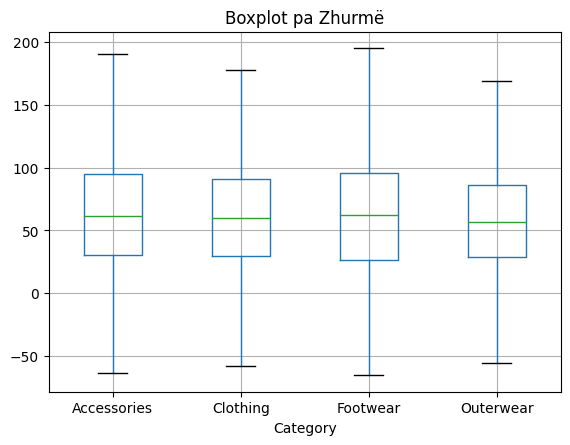

In [41]:
# Shfaq boxplotin pa zhurmë
shfaq_boxplotin_per_zhurme('Boxplot pa Zhurmë', df)

- Shembull - Review Rating

Dataset with Negative Values - Review Rating:
      Review Rating
0               3.1
1               3.1
2               3.1
3               3.5
4               2.7
...             ...
3961           -4.1
3962           -3.9
3963           -2.8
3964           -2.6
3965            4.0

[3963 rows x 1 columns]



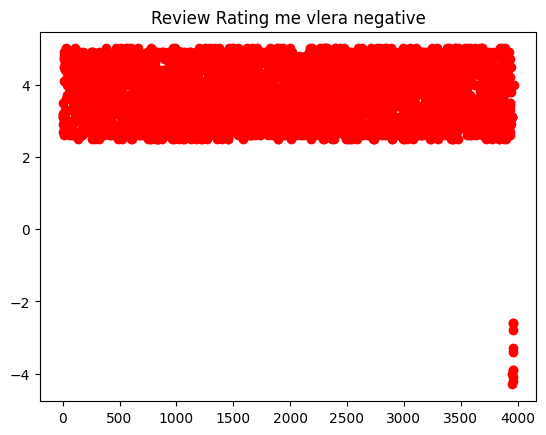

In [42]:
# Shfaqja e dataset-it me vlera potenciale negative në kolonën 'Review Rating'
print("Dataset with Negative Values - Review Rating:")
print(df[['Review Rating']])
print()

# Vizualimi i kolonës 'Review Rating' me zhurmë
plt.scatter(df.index, df['Review Rating'], label='Review Rating', color='red')
plt.title('Review Rating me vlera negative')
plt.show()

Dataset pas pastrimit të vlerave negative - Review Rating:
      Review Rating
0               3.1
1               3.1
2               3.1
3               3.5
4               2.7
...             ...
3961            0.0
3962            0.0
3963            0.0
3964            0.0
3965            4.0

[3963 rows x 1 columns]



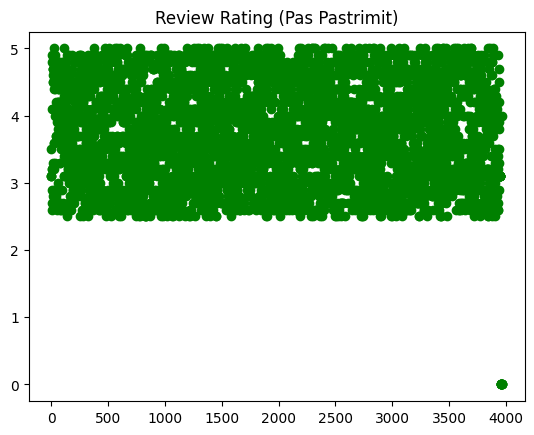

In [43]:
# Pastrimi i zhurmës: Kufizimi i vlerave negative në një rang të vlefshëm
df['Review Rating'] = np.clip(df['Review Rating'], 0, 5)

# Shafqja e datasetit pas pastrimit
print("Dataset pas pastrimit të vlerave negative - Review Rating:")
print(df[['Review Rating']])
print()

#  Vizualimi i kolonës 'Review Rating' pas pastrimit të zhurmës
plt.scatter(df.index, df['Review Rating'], label='Review Rating (After Cleaning)', color='green')
plt.title('Review Rating (Pas Pastrimit)')
plt.show()

#### Skewness data

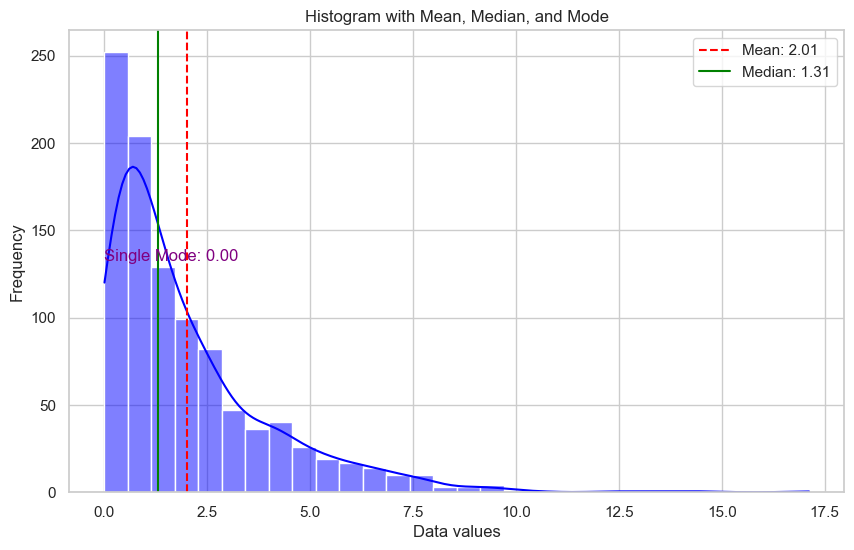

In [11]:
# Generate a skewed data set for demonstration purposes
np.random.seed(0)
data = np.random.exponential(scale=2.0, size=1000)

# Calculate mean and median
mean = np.mean(data)
median = np.median(data)

# Calculate mode and its count
mode_res = stats.mode(data)

# Extract the mode and count values
mode = mode_res.mode.item()  # Convert numpy scalar to a Python scalar
count = mode_res.count.item()

# Plot the distribution and mark the mean, median, and mode
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True, color="blue", bins=30)
plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', linestyle='-', label=f'Median: {median:.2f}')

# Add a line for the mode if it's a valid value, or a text annotation if not
if count > 1:  # Check if the mode occurs more than once
    plt.axvline(mode, color='purple', linestyle='-', label=f'Mode: {mode:.2f}')
else:
    plt.text(1.1 * mode, plt.ylim()[1] * 0.5, f'Single Mode: {mode:.2f}', color='purple')

plt.legend()
plt.title('Histogram with Mean, Median, and Mode')
plt.xlabel('Data values')
plt.ylabel('Frequency')
plt.show()
